<a href="https://colab.research.google.com/github/duranduman06/Plant-Disease-Classification-Using-CNN/blob/main/PlantDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


# **Libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers, Sequential, models
from sklearn.metrics import confusion_matrix, classification_report

# **Data Preprocessing**


> Bu adımda eğitilecek olan train_dataset ve validasyon için kullanılacak validation_dataset'in ön işleme süreçleri yapıldı.
> Data türü .jpg formatında olduğu için keras'ın sağlamış olduğu **"image_dataset_from_directory function"** fonksiyonu kullandım.




### **Train Data Preprocessing**

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/gdrive/MyDrive/CNN/yeni_train_potato",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=12,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5707 files belonging to 3 classes.


In [ ]:
print(train_dataset)

class_names = train_dataset.class_names
print(class_names)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


### **Validation Data Preprocessing**

In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/gdrive/MyDrive/CNN/yeni_validation_potato",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=12,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 1426 files belonging to 3 classes.


In [ ]:
print(validation_dataset)
print(train_dataset)

class_names = validation_dataset.class_names
print(class_names)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


# **Class Dağılımları**

### **Train ve Validation Dataset Class Dağılımı**

In [ ]:
from collections import Counter

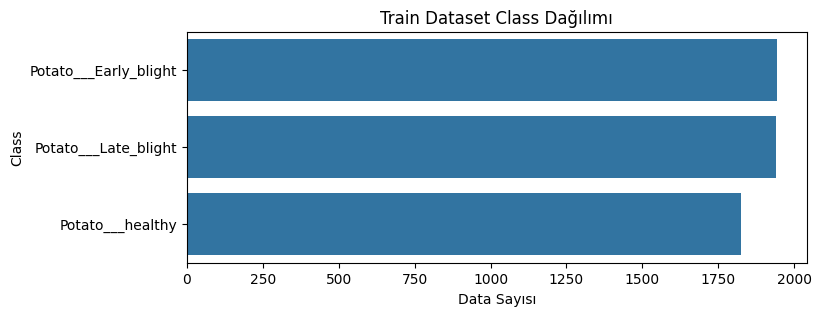

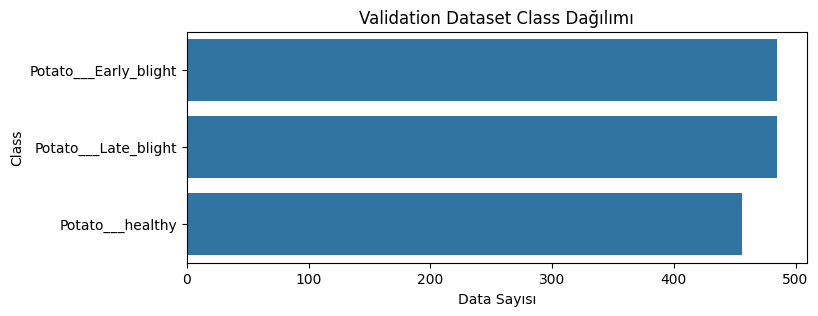

In [ ]:
def plot_class_distribution(dataset, class_names, dataset_name):

    # Tüm labelları alır ve class sayılarını hesaplar
    all_labels = []
    for _, labels_batch in dataset:
        all_labels.extend([class_names[label] for label in labels_batch.numpy().argmax(axis=1)])

    # Class sayılarını hesaplar
    class_counts = Counter(all_labels)

    # class dağılımını seaborn ile görselleştirir
    plt.figure(figsize=(8, 3))
    ax = sns.barplot(y=class_names, x=[class_counts[class_name] for class_name in class_names])
    plt.title(str(dataset_name)+' Class Dağılımı')
    plt.xlabel('Data Sayısı')
    plt.ylabel('Class')
    plt.show()

# train_dataset için class dağılımı
plot_class_distribution(train_dataset, train_dataset.class_names, "Train Dataset")

# validation_dataset için class dağılımı
plot_class_distribution(validation_dataset, validation_dataset.class_names, "Validation Dataset")


# **Veri Görselleştirme**

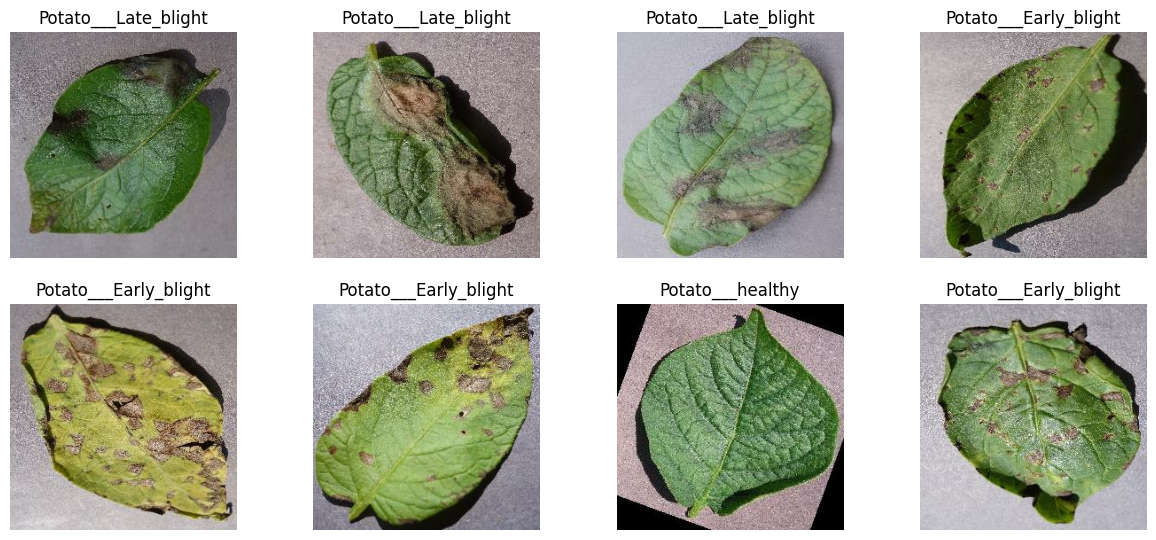

In [ ]:
images = []
labels = []
for image_batch, label_batch in train_dataset.take(1):
    for i in range(8):
        images.append(image_batch[i].numpy().astype('int'))
        labels.append(train_dataset.class_names[label_batch[i].numpy().argmax()])

plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# **Model Building**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_data = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
    ])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model eğitimi
history = model.fit(train_data,
                    batch_size= 32,
                    epochs=10,
                    verbose=1,
                    validation_data = validation_data,
                    )

Epoch 1/10
179/179 [==============================] - 29s 146ms/step - loss: 0.6039 - accuracy: 0.7417 - val_loss: 1.0910 - val_accuracy: 0.6108
Epoch 2/10
179/179 [==============================] - 11s 63ms/step - loss: 0.2613 - accuracy: 0.8985 - val_loss: 0.1243 - val_accuracy: 0.9544
Epoch 3/10
179/179 [==============================] - 11s 63ms/step - loss: 0.1121 - accuracy: 0.9581 - val_loss: 0.0867 - val_accuracy: 0.9698
Epoch 4/10
179/179 [==============================] - 11s 61ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 0.1495 - val_accuracy: 0.9495
Epoch 5/10
179/179 [==============================] - 11s 61ms/step - loss: 0.0693 - accuracy: 0.9734 - val_loss: 0.2276 - val_accuracy: 0.9327
Epoch 6/10
179/179 [==============================] - 11s 61ms/step - loss: 0.0511 - accuracy: 0.9806 - val_loss: 0.2297 - val_accuracy: 0.9299
Epoch 7/10
179/179 [==============================] - 11s 61ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.1616 - val_accuracy

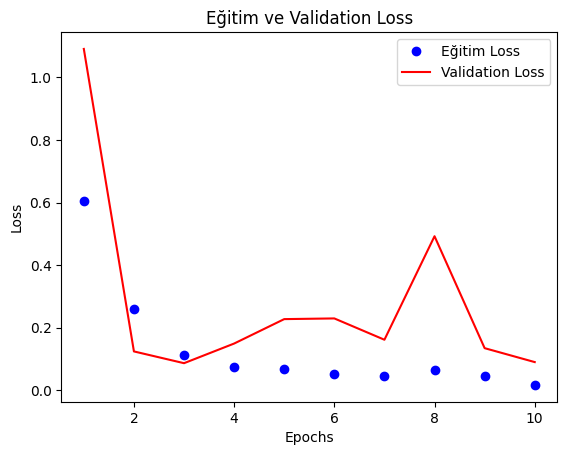

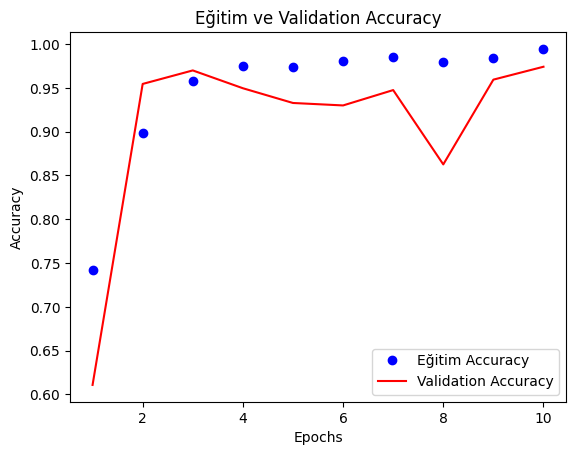

In [ ]:
import matplotlib.pyplot as plt

# Loss ve val_loss değerlerini al
loss = history.history['loss']
val_loss = history.history['val_loss']

# Accuracy ve val_accuracy değerlerini al
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Epoch sayısını al
epochs = range(1, len(loss) + 1)

# Loss grafiği
plt.plot(epochs, loss, 'bo', label='Eğitim Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Eğitim ve Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy grafiği
plt.plot(epochs, accuracy, 'bo', label='Eğitim Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Eğitim ve Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save("plant_disease_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
